#Linear Algebra

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

Text(0.5,1,'1.1 Graph a Vector')

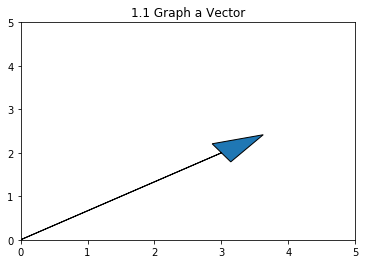

In [10]:
a = np.array([3,2])
plt.arrow(0,0,a[0], a[1], head_width = 0.5)
plt.xlim(0,5)
plt.ylim(0,5)
plt.title('1.1 Graph a Vector')

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [11]:
#The norm of a vector is the magnitude. It is the length of the vector in space.
norm_b = (17**2 + (-4)**2 + (-2)**2 + 1**2)**0.5
norm_b

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [12]:
c_dot_d = 3*9 + 7*-7 + -2*4 + 6*12
c_dot_d

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [13]:
E_t = np.array([[7,1,2], [4,3,6],[2,6,-4]])
E_t
E_1 = np.linalg.inv(np.array([[7,4,2],[1,3,-1],[2,6,4]]))
E_t, E_1



(array([[ 7,  1,  2],
        [ 4,  3,  6],
        [ 2,  6, -4]]), array([[ 0.17647059, -0.03921569, -0.09803922],
        [-0.05882353,  0.23529412,  0.08823529],
        [-0.        , -0.33333333,  0.16666667]]))

manual calculation:
determinant:
- 7 * ((3*-4) - (-1*6)) 
- -(4) *((1*-4)-(-1*2))
- 2 * ((1*6)-(3*2))

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [14]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df_2 = pd.DataFrame({'customers': customers, 'snow': snow})

df_2.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [15]:
##### Your Code Here #####
df_2['customers'].mean(),df_2['customers'].std() ,df_2['customers'].var(), \
df_2['snow'].mean(), df_2['snow'].std(),df_2['snow'].var()

(1135.7142857142858,
 314.26406851866597,
 98761.90476190478,
 2.7142857142857144,
 2.9277002188455996,
 8.571428571428571)

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

no. original data are on  much different scales. snow variance is inches^2/day and customers is customers^2/day.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [16]:
m = df_2.values
m = StandardScaler().fit_transform(m)
var_cov = np.matmul(m.T,m)
df_2.cov(), \
var_cov ,\
np.cov(df_2.values.T)

C:\Users\cwcol\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(              customers        snow
 customers  98761.904762  670.238095
 snow         670.238095    8.571429, array([[7.        , 5.09924425],
        [5.09924425, 7.        ]]), array([[9.87619048e+04, 6.70238095e+02],
        [6.70238095e+02, 8.57142857e+00]]))

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [17]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [18]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [19]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 105  245  685  147  193  156  720  253  488  198  360 1102 1472   57
  1374  375   54]
 [ 103  227  803  160  235  175  874  265  570  203  365 1137 1582   73
  1256  475   64]
 [ 103  242  750  122  184  147  566  171  418  220  337  957 1462   53
  1572  458   62]
 [  66  267  586   93  209  139 1033  143  355  187  334  674 1494   47
  1506  135   41]]


In [20]:
##### Your Code Here #####
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(X)
scaled_data

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [29]:
labels = ["England","Wales","Scotland","North Ireland"]

,0,1
England,-0.954490,0.328318
Wales,-4.520951,-1.735380
Scotland,0.487978,3.233672
North Ireland,4.987462,-1.826611


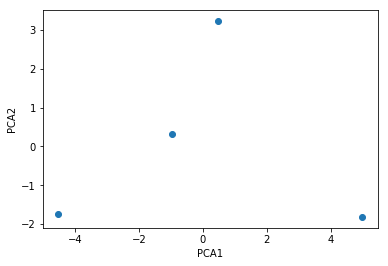

In [30]:
##### Your Code Here #####
from sklearn.decomposition import PCA
pca = PCA(2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data.T[0],pca_data.T[1],)

plt.xlabel("PCA1")
plt.ylabel("PCA2")

pca_df = pd.DataFrame(pca_data, labels)


pca_df

In [65]:
##### Your Code Here #####
from sklearn.decomposition import PCA
pca = PCA(2)

pca_data = pca.fit_transform(scaled_data)

pca_df1 = pd.DataFrame(pca_data)
labels = pd.DataFrame(labels)
pca_df1['labels'] = labels 

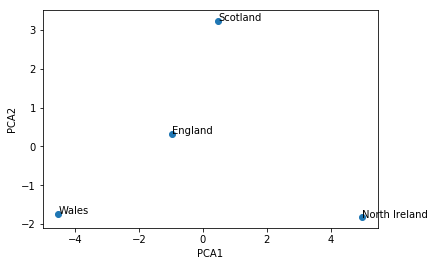

In [92]:
plt.xlim=(-6,6)
plt.ylim=(-6,6)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.scatter(pca_df1[0],pca_df1[1])


for x,i in pca_df1.iterrows():
    plt.text(x = pca_df1[0][x],y= pca_df1[1][x], s = pca_df1['labels'][x] )
    

In [82]:
pca_df1[0][0],pca_df1[1][0],pca_df1[0][2]

(-0.9544898377790775, 0.3283183249496735, 0.48797834944518936)

In [78]:
pca_df1['labels'][0]

'England'

In [80]:
pca_df1

,0,1,labels
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,North Ireland


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [ ]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

In [ ]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

In [ ]:
##### Your Code Here #####

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_


In [ ]:
plt.scatter(points['x'],points['y'], c = labels, cmap = 'viridis')
plt.scatter(clusters.T[0],clusters.T[1], color = 'black', s=50)

In [ ]:
sum_of_squared_distances_points = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances_points.append(km.inertia_)
plt.plot(K, sum_of_squared_distances_points, 'bx-')
sum_of_squared_distances_points

Justification:
I just happened to chose k = 4 and it looks pretty good. I then tried using k=3, but the bottom two clusters were one group. If you look at the sum of squared differences tables, you see there is a large drop from k=3 to k=4. But moving from k=4 to k=5 nearly cuts the ssd in half. When you plot it with colors, you can see the bottom most cluster work best as two different clusters.


# bonus work, standardize & PCA last part


In [ ]:
pca_points = pca.fit_transform(StandardScaler().fit_transform(points))
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_points)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_
plt.scatter(pca_points.T[0],pca_points.T[1]*-1, c = labels, cmap = 'viridis')
plt.scatter(clusters.T[0],clusters.T[1]*-1, color = 'black', s=50)

In [ ]:
sum_of_squared_distances_pca_points = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_points)
    sum_of_squared_distances_pca_points.append(km.inertia_)
plt.plot(K, sum_of_squared_distances_pca_points, 'bx-')
sum_of_squared_distances_pca_points

In [ ]:
np.array(sum_of_squared_distances_points) / np.array(sum_of_squared_distances_pca_points)